<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_4_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.855810,49.783388,22.774817,5.096568,157.510584,153.780762,3.729822
1,0.0,1.0,46.717256,71.910672,98.170110,-6.013149,220.784889,226.006044,-5.221155
2,0.0,2.0,64.026091,28.657650,48.284176,6.149652,157.117570,152.377304,4.740265
3,0.0,3.0,63.155219,89.217680,66.796866,-1.036279,228.133485,228.671806,-0.538321
4,0.0,4.0,23.792786,37.556739,97.952283,-2.616917,166.684890,169.113925,-2.429035
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,55.526542,28.083855,29.299301,-6.484666,116.425032,121.133973,-4.708941
59996,999.0,56.0,83.897706,87.827669,77.577042,9.033104,268.335521,259.620389,8.715132
59997,999.0,57.0,71.939440,44.484564,68.076492,3.661637,198.162134,194.295623,3.866511
59998,999.0,58.0,37.794981,81.893920,50.290707,12.235605,192.215213,179.715865,12.499348


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.855810  49.783388  22.774817  ...  157.510584  153.780762   3.729822
      1.0    46.717256  71.910672  98.170110  ...  220.784889  226.006044  -5.221155
      2.0    64.026091  28.657650  48.284176  ...  157.117570  152.377304   4.740265
      3.0    63.155219  89.217680  66.796866  ...  228.133485  228.671806  -0.538321
      4.0    23.792786  37.556739  97.952283  ...  166.684890  169.113925  -2.429035
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   55.526542  28.083855  29.299301  ...  116.425032  121.133973  -4.708941
      56.0   83.897706  87.827669  77.577042  ...  268.335521  259.620389   8.715132
      57.0   71.939440  44.484564  68.076492  ...  198.162134  194.295623   3.866511
      58.0   37.794981  81.893920  50.290707  ...  192.215213  179.715865  12.499348
      59.0   87.757496  60.404784  50.450446  ...  216.778098  207.513717   9.264381

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.855810  49.783388  22.774817  ...  157.510584  153.780762   3.729822
      1.0    46.717256  71.910672  98.170110  ...  220.784889  226.006044  -5.221155
      2.0    64.026091  28.657650  48.284176  ...  157.117570  152.377304   4.740265
      3.0    63.155219  89.217680  66.796866  ...  228.133485  228.671806  -0.538321
      4.0    23.792786  37.556739  97.952283  ...  166.684890  169.113925  -2.429035
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   55.526542  28.083855  29.299301  ...  116.425032  121.133973  -4.708941
      56.0   83.897706  87.827669  77.577042  ...  268.335521  259.620389   8.715132
      57.0   71.939440  44.484564  68.076492  ...  198.162134  194.295623   3.866511
      58.0   37.794981  81.893920  50.290707  ...  192.215213  179.715865  12.499348
      59.0   87.757496  60.404784  50.450446  ...  216.778098  207.513717   9.264381

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.855810,49.783388,22.774817,5.096568,157.510584,153.780762,3.729822
1,0.0,1.0,46.717256,71.910672,98.170110,-6.013149,220.784889,226.006044,-5.221155
2,0.0,2.0,64.026091,28.657650,48.284176,6.149652,157.117570,152.377304,4.740265
3,0.0,3.0,63.155219,89.217680,66.796866,-1.036279,228.133485,228.671806,-0.538321
4,0.0,4.0,23.792786,37.556739,97.952283,-2.616917,166.684890,169.113925,-2.429035
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,55.526542,28.083855,29.299301,-6.484666,116.425032,121.133973,-4.708941
59996,999.0,56.0,83.897706,87.827669,77.577042,9.033104,268.335521,259.620389,8.715132
59997,999.0,57.0,71.939440,44.484564,68.076492,3.661637,198.162134,194.295623,3.866511
59998,999.0,58.0,37.794981,81.893920,50.290707,12.235605,192.215213,179.715865,12.499348


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.855810  49.783388  22.774817  ...  157.510584  153.780762   3.729822
      1.0    46.717256  71.910672  98.170110  ...  220.784889  226.006044  -5.221155
      2.0    64.026091  28.657650  48.284176  ...  157.117570  152.377304   4.740265
      3.0    63.155219  89.217680  66.796866  ...  228.133485  228.671806  -0.538321
      4.0    23.792786  37.556739  97.952283  ...  166.684890  169.113925  -2.429035
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   55.526542  28.083855  29.299301  ...  116.425032  121.133973  -4.708941
      56.0   83.897706  87.827669  77.577042  ...  268.335521  259.620389   8.715132
      57.0   71.939440  44.484564  68.076492  ...  198.162134  194.295623   3.866511
      58.0   37.794981  81.893920  50.290707  ...  192.215213  179.715865  12.499348
      59.0   87.757496  60.404784  50.450446  ...  216.778098  207.513717   9.264381

[60000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

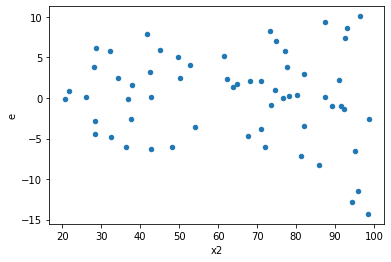

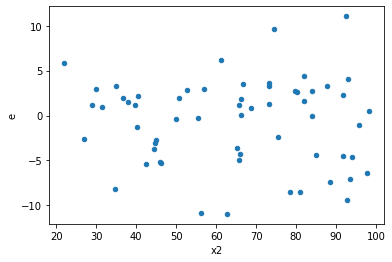

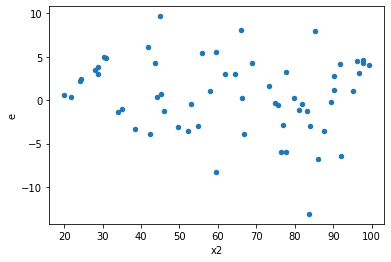

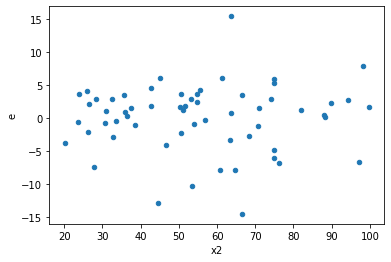

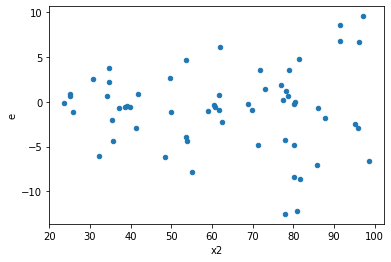

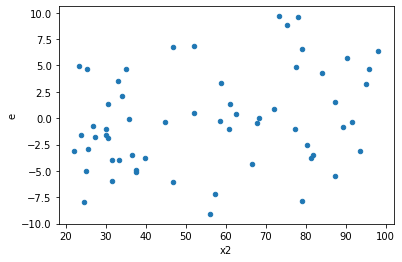

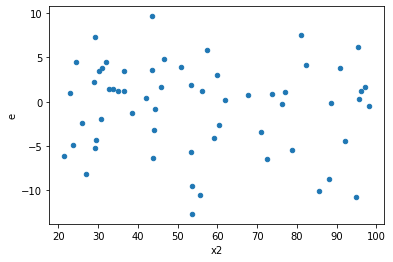

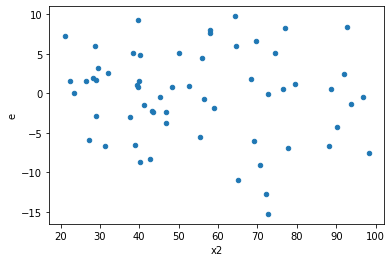

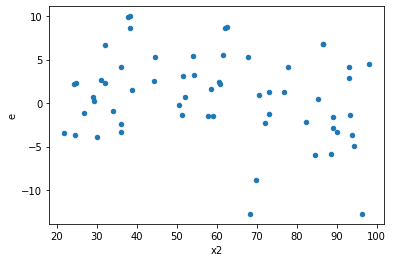

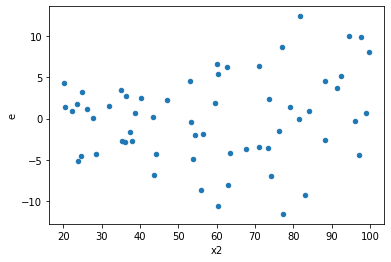

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,33.0,410.6242492037864,1209.493569942385,20.53121246018932,37.79667406069953,1.8744088490131843,0.13348947585201865,0.9332552620739907,Reject001=1 : Homoscedasticity
2.0,29.0,25.0,481.28401833524265,432.18139546334896,17.18871494054438,18.007558144306206,1.041651913711123,0.9089337461351592,0.5455331269324204,Reject001=1 : Homoscedasticity
4.0,20.0,34.0,338.65483823169444,704.252290327,17.82393885429971,21.340978494757575,1.2232692593339083,0.6443961531478704,0.6778019234260648,Reject001=1 : Homoscedasticity
6.0,27.0,27.0,542.6822782663526,750.0820820080105,20.872395317936636,28.849310846461943,1.3821753759938786,0.4057754529724291,0.7971122735137854,Reject001=1 : Homoscedasticity
12.0,21.0,33.0,330.8836932667271,1385.1053256712719,16.544184663336356,43.284541427227246,2.6638685427156528,0.021176660653791313,0.9894116696731043,Reject001=1 : Homoscedasticity
15.0,35.0,19.0,443.61131457810285,818.709182327852,13.04739160523832,45.48384346265844,3.3997070052105394,0.0016816298116359985,0.999159185094182,Reject001=0 : Heteroscedasticity
16.0,31.0,23.0,889.8705630277881,694.6507716136211,29.66235210092627,31.575035073346417,1.0521400192401673,0.8816672766875469,0.5591663616562266,Reject001=1 : Homoscedasticity
18.0,27.0,27.0,651.2298875014915,724.5954606795251,25.04730336544198,27.869056179981733,1.1126569504656918,0.7835263312953944,0.6082368343523028,Reject001=1 : Homoscedasticity
19.0,31.0,23.0,1070.1400352199757,811.6675988548747,35.671334507332524,36.893981766130665,1.0222837457427558,0.9398542494586184,0.5300728752706908,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,33.0,410.6242492037864,1209.493569942385,20.53121246018932,37.79667406069953,1.8744088490131843,0.13348947585201865,Reject001=1 : Homoscedasticity
1.0,25.0,29.0,710.0179247318222,545.3745606486735,29.584080197159256,19.47766288030977,0.6621670621842407,0.2848617591972291,Reject001=1 : Homoscedasticity
2.0,29.0,25.0,481.28401833524265,432.18139546334896,17.18871494054438,18.007558144306206,1.041651913711123,1.0910662538648408,Reject001=1 : Homoscedasticity
3.0,33.0,21.0,869.615365781213,425.92428582338744,27.175480180662905,21.29621429116937,0.7696616439233577,0.5349948648413849,Reject001=1 : Homoscedasticity
4.0,20.0,34.0,338.65483823169444,704.252290327,17.82393885429971,21.340978494757575,1.2232692593339083,1.3556038468521296,Reject001=1 : Homoscedasticity
5.0,33.0,21.0,843.0177974923926,258.58008419165435,26.344306171637268,12.929004209582718,0.48200658812880864,0.08238233569935866,Reject001=1 : Homoscedasticity
6.0,27.0,27.0,542.6822782663526,750.0820820080105,20.872395317936636,28.849310846461943,1.3821753759938786,0.4057754529724291,Reject001=1 : Homoscedasticity
7.0,27.0,27.0,981.3763131197937,661.7480184416411,37.74524281229976,25.45184686314004,0.6743060838078974,0.3119350437630803,Reject001=1 : Homoscedasticity
8.0,20.0,34.0,499.8821232393132,536.5025001501589,26.309585433648063,16.257651519701785,0.6313282497993962,0.23175080060216843,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      937
Reject001=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64